## Importing Libraries

In [77]:
from bci_utils import *

## Hyperparameters

In [78]:
# Set hyperparameters
CV_splits = 10
test_size = 0.2
random_state = 16
num_layers = 2
batch_size = 32
n_epochs = 20
## TODO: Train subjects, Test subjects, add all data
# Using same hyperparameters across models to compare performance

## Loading data

In [79]:
data_path = "../Data/BCICIV_2a_gdf/"

In [111]:
raw = mne.io.read_raw_gdf(data_path + "A01T.gdf")

print(raw.info)
print(raw.ch_names)

Extracting EDF parameters from c:\Users\jjaya\Desktop\Trojan USC\Course\CSCI 566 Deep Learning\Project\Git\EEG-MI-Benchmarking\Data\BCICIV_2a_gdf\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
<Info | 8 non-empty values
 bads: []
 ch_names: EEG-Fz, EEG-0, EEG-1, EEG-2, EEG-3, EEG-4, EEG-5, EEG-C3, EEG-6, ...
 chs: 25 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 2005-01-17 12:00:00 UTC
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
 subject_info: 4 items (dict)
>
['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG

c:\Users\jjaya\miniconda3\envs\dsml\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


In [112]:
# Find the events time positions
events, _ = mne.events_from_annotations(raw)

# Pre-load the data
raw.load_data()

# Filter the raw signal with a band pass filter in 7-35 Hz
raw.filter(7., 35., fir_design='firwin')

# Remove the EOG channels and pick only desired EEG channels
raw.info['bads'] += ['EOG-left', 'EOG-central', 'EOG-right']
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False, stim=False,
                       exclude='bads')

# Extracts epochs of 3s time period from the datset into 288 events for all 4 classes
tmin, tmax = 1., 4.
# left_hand = 769,right_hand = 770,foot = 771,tongue = 772
event_id = dict({'769': 7,'770': 8,'771': 9,'772': 10})

epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                baseline=None, preload=True)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.2s


Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 751 original time points ...
0 bad epochs dropped


<Evoked | '769' (average, N=72), 1 – 4 s, baseline off, 22 ch, ~156 kB>


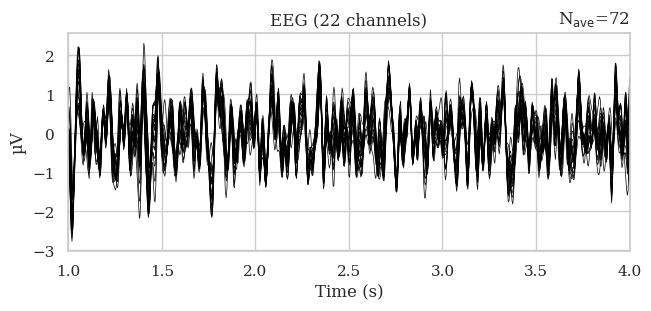

<Evoked | '770' (average, N=72), 1 – 4 s, baseline off, 22 ch, ~156 kB>


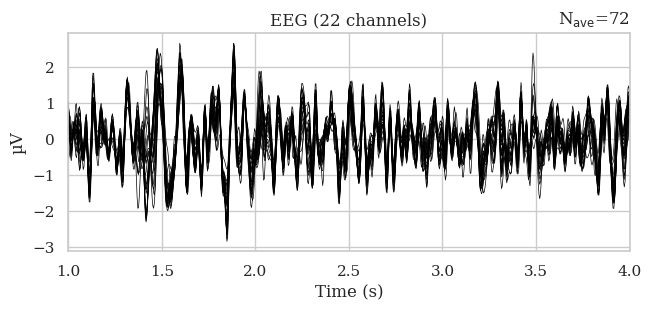

<Evoked | '771' (average, N=72), 1 – 4 s, baseline off, 22 ch, ~156 kB>


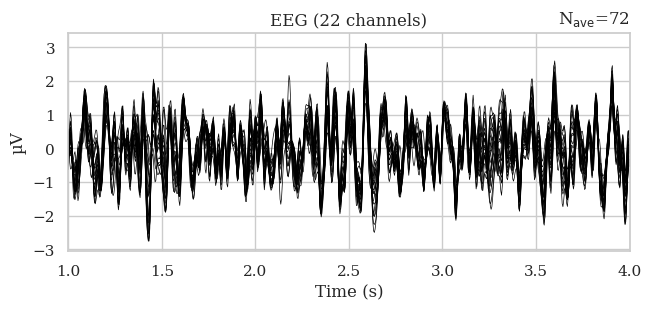

<Evoked | '772' (average, N=72), 1 – 4 s, baseline off, 22 ch, ~156 kB>


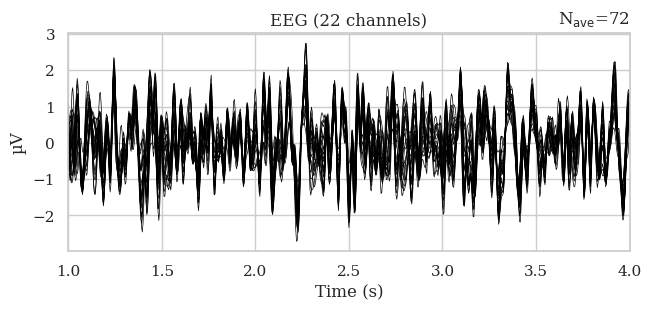

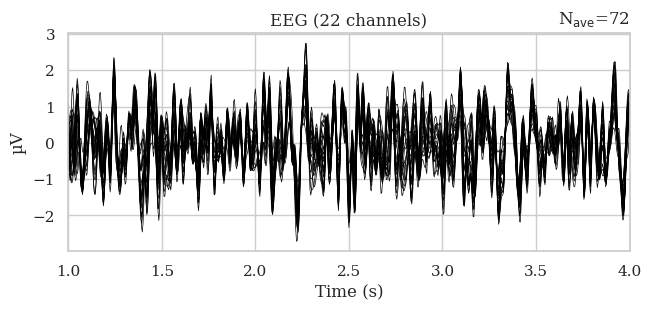

In [5]:
# left_hand = 769,right_hand = 770,foot = 771,tongue = 772

# Left hand epoch average plot
evoked = epochs['769'].average()
print(evoked)
evoked.plot(time_unit='s')

# Right hand epoch average plot
evoked = epochs['770'].average()
print(evoked)
evoked.plot(time_unit='s')

# Foot epoch average plot
evoked = epochs['771'].average()
print(evoked)
evoked.plot(time_unit='s')

# Tongue epoch average plot
evoked = epochs['772'].average()
print(evoked)
evoked.plot(time_unit='s')

In [6]:
# Getting labels and changing labels from 7,8,9,10 -> 1,2,3,4
labels = epochs.events[:,-1] - 7 + 1 
data = epochs.get_data()

C:\Users\Sam\AppData\Local\Temp\ipykernel_17528\3131055463.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()


In [9]:
reshaped_data = np.array(np.transpose(data, (0, 2, 1)))
reshaped_data = np.expand_dims(reshaped_data, axis=-1)

In [75]:
print(f"Data shape: {data.shape}, Reshaped Data shape: {reshaped_data.shape}, Labels shape: {labels.shape}")

Data shape: (288, 22, 751), Reshaped Data shape: (288, 751, 22, 1), Labels shape: (288,)


## Loading all Data

In [114]:
def load_file(filename):
    raw = mne.io.read_raw_gdf(data_path + filename)
    events, _ = mne.events_from_annotations(raw)
    raw.load_data()
    raw.filter(7., 35., fir_design='firwin')
    raw.info['bads'] += ['EOG-left', 'EOG-central', 'EOG-right']
    picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False, stim=False,
                        exclude='bads')
    tmin, tmax = 1., 4.
    # left_hand = 769,right_hand = 770,foot = 771,tongue = 772
    event_id = dict({'769': 7,'770': 8,'771': 9,'772': 10})
    epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                    baseline=None, preload=True, on_missing='ignore')
    labels = epochs.events[:,-1] - 7 + 1 
    data = epochs.get_data()
    return data, labels

In [116]:
os.listdir(data_path)

['A01E.gdf',
 'A01T.gdf',
 'A02E.gdf',
 'A02T.gdf',
 'A03E.gdf',
 'A03T.gdf',
 'A04E.gdf',
 'A04T.gdf',
 'A05E.gdf',
 'A05T.gdf',
 'A06E.gdf',
 'A06T.gdf',
 'A07E.gdf',
 'A07T.gdf',
 'A08E.gdf',
 'A08T.gdf',
 'A09E.gdf',
 'A09T.gdf']

In [ ]:
train_list = []
test_list = []
for filename in os.listdir(data_path):
    print(filename)
    if filename.endswith("T.gdf"):
        data, labels = load_file(filename)
        train_list.append((data, labels))
    if filename.endswith("E.gdf"):
        data, labels = load_file(filename)
        test_list.append((data, labels))

In [130]:
# result = np.concatenate((all_data[0][0], all_data[1][0]), axis=0)
train_data = np.concatenate(([a[0] for a in train_list]), axis = 0)
train_label = np.concatenate(([a[1] for a in train_list]), axis = 0)
test_data = np.concatenate(([a[0] for a in test_list]), axis = 0)
test_label = np.concatenate(([a[1] for a in test_list]), axis = 0)

In [135]:
test_label.shape

(2592,)

## Feature Extraction

In [136]:
# Wavelet Packet Decomposition
# signal is decomposed to level 5 with 'db4' wavelet
wpd_data = feature_bands(train_data)
wpd_test_data = feature_bands(test_data)

# Direct comparision

## Models

In [137]:
# OneHotEncoding Labels
enc = OneHotEncoder()
X_out = enc.fit_transform(labels.reshape(-1,1)).toarray()

# Cross Validation Split
cv = ShuffleSplit(n_splits = CV_splits, test_size = test_size, random_state = random_state)

## Training models

In [138]:
def CV_train(model, cnn = False, convlstm = False):
    acc = []
    ka = []
    prec = []
    recall = []
    results = {}
    best_model = model
    prev_metric = 0
    for train_idx, test_idx in cv.split(labels):

        Csp = [];ss = [];nn = [] # empty lists

        label_train, label_test = labels[train_idx], labels[test_idx]
        y_train, y_test = X_out[train_idx], X_out[test_idx] ## TODO: change this to val, code test split!! use all subjects, 789 for test
        # TODO: Save different X_train cv splits and reuse ??, do preprocessing separate from training

        # CSP filter applied separately for all Frequency band coefficients

        Csp = [CSP(n_components=8, reg=None, log=True, norm_trace=False) for _ in range(8)]
        ss = preprocessing.StandardScaler()

        X_train = ss.fit_transform(np.concatenate(tuple(Csp[x].fit_transform(wpd_data[x,train_idx,:,:],label_train) for x  in range(8)),axis=-1))

        X_test = ss.transform(np.concatenate(tuple(Csp[x].transform(wpd_data[x,test_idx,:,:]) for x  in range(8)),axis=-1))
        
        if cnn:
            X_train = np.expand_dims(X_train,2)
        elif convlstm:
            X_train = np.expand_dims(np.expand_dims(X_train, 2),2)

        nn = model

        nn.fit(X_train, y_train, batch_size = batch_size, epochs = n_epochs)

        y_pred = nn.predict(X_test)
        pred = (y_pred == y_pred.max(axis=1)[:,None]).astype(int)

        acc_score = accuracy_score(y_test.argmax(axis=1), pred.argmax(axis=1))
        acc.append(acc_score)
        ka.append(cohen_kappa_score(y_test.argmax(axis=1), pred.argmax(axis=1)))
        prec.append(precision_score(y_test.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
        recall.append(recall_score(y_test.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
        if acc_score > prev_metric: ## TODO: Switch to F1 score
            prev_metric = acc_score
            best_model = model
    results['Accuracy'] = acc
    results['Kappa'] = ka
    results['Precision'] = prec
    results['Recall'] = recall
    return best_model, results

In [139]:
mlp = build_mlp_classifier(input_shape = 64, num_layers = num_layers)
mlp, mlp_results = CV_train(mlp)

Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 22 dim * 2.3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 22 dim * 2.3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 22 dim * 2.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 22 dim * 2.2e+09  max singular value)


In [140]:
cnn = build_cnn_classifier(input_shape = (64, 1), num_layers = num_layers)
cnn, cnn_results = CV_train(cnn, cnn=True)


Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 22 dim * 2.3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 22 dim * 2.3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 22 dim * 2.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 22 dim * 2.2e+09  max singular value)

In [141]:
convlstm = build_convlstm_classifier(input_shape = (64, 1, 1), num_layers = 1) ## TODO: Check for multiple convlstm layers
convlstm, convlstm_results = CV_train(convlstm, convlstm = True)

Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 22 dim * 2.3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 22 dim * 2.3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 22 dim * 2.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 22 dim * 2.2e+09  max singular value)


## Results

In [142]:
print_results(mlp_results)

      Accuracy     Kappa  Precision    Recall
Fold                                         
F1    0.258621  0.021961   0.263889  0.258621
F2    0.189655 -0.048865   0.261460  0.189655
F3    0.362069  0.150772   0.368305  0.362069
F4    0.258621  0.008350   0.273436  0.258621
F5    0.241379  0.005456   0.270795  0.241379
F6    0.275862  0.050292   0.296565  0.275862
F7    0.275862  0.040189   0.332398  0.275862
F8    0.258621  0.028059   0.333333  0.258621
F9    0.241379 -0.011094   0.269089  0.241379
F10   0.327586  0.115023   0.354356  0.327586
Avg   0.268966  0.036014   0.302363  0.268966


In [77]:
print_results(cnn_results)

      Accuracy     Kappa  Precision    Recall
Fold                                         
F1    0.586207  0.446301   0.629560  0.586207
F2    0.689655  0.582400   0.701509  0.689655
F3    0.672414  0.562351   0.679293  0.672414
F4    0.758621  0.665844   0.813937  0.758621
F5    0.775862  0.702799   0.830969  0.775862
F6    0.844828  0.792032   0.863455  0.844828
F7    0.810345  0.746120   0.824224  0.810345
F8    0.810345  0.743775   0.817692  0.810345
F9    0.741379  0.656805   0.766235  0.741379
F10   0.793103  0.723810   0.827229  0.793103
Avg   0.748276  0.662224   0.775410  0.748276


In [143]:
print_results(cnn_results)

      Accuracy     Kappa  Precision    Recall
Fold                                         
F1    0.241379 -0.025723   0.222291  0.241379
F2    0.189655 -0.061940   0.220899  0.189655
F3    0.258621  0.020809   0.262931  0.258621
F4    0.310345  0.083366   0.325205  0.310345
F5    0.206897 -0.038132   0.281629  0.206897
F6    0.379310  0.176331   0.397661  0.379310
F7    0.241379 -0.008696   0.259195  0.241379
F8    0.224138 -0.033254   0.244828  0.224138
F9    0.275862  0.034100   0.299945  0.275862
F10   0.293103  0.079365   0.330152  0.293103
Avg   0.262069  0.022623   0.284474  0.262069


In [78]:
print_results(convlstm_results)

      Accuracy     Kappa  Precision    Recall
Fold                                         
F1    0.672414  0.561480   0.669982  0.672414
F2    0.568966  0.422081   0.579183  0.568966
F3    0.741379  0.654488   0.748479  0.741379
F4    0.586207  0.441860   0.683451  0.586207
F5    0.810345  0.746524   0.856825  0.810345
F6    0.775862  0.699242   0.777273  0.775862
F7    0.706897  0.600162   0.732361  0.706897
F8    0.586207  0.462963   0.698102  0.586207
F9    0.775862  0.699362   0.805585  0.775862
F10   0.741379  0.648627   0.769536  0.741379
Avg   0.696552  0.593679   0.732078  0.696552


In [144]:
print_results(convlstm_results)

      Accuracy     Kappa  Precision    Recall
Fold                                         
F1    0.258621 -0.001606   0.333812  0.258621
F2    0.293103  0.050319   0.281819  0.293103
F3    0.344828  0.132966   0.317566  0.344828
F4    0.241379 -0.023666   0.212040  0.241379
F5    0.189655 -0.101414   0.188637  0.189655
F6    0.241379  0.014291   0.248217  0.241379
F7    0.241379  0.003903   0.310345  0.241379
F8    0.189655 -0.062354   0.234483  0.189655
F9    0.189655 -0.079177   0.192572  0.189655
F10   0.189655 -0.033359   0.238013  0.189655
Avg   0.237931 -0.010010   0.255750  0.237931


# Robustness Testing